In [1]:
%matplotlib inline

In [2]:
import numpy as np
import iopro
import matplotlib.pyplot as plt

In [3]:
def plot_cvscan(cvscan_fname, ax=None, xlim=None, ylim=None,
                quad_lsq=False,
                title=None, axis_fontsize=16, tick_labelsize=12):
    
    # plot the data
    arr = iopro.genfromtxt(cvscan_fname)
    if ax is None: ax = plt.gca()
    ax.plot(arr[:,0], arr[:,2])
    
    # adjust ranges
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
        
    # perform least squares to a quadratic function. 
    # note: uses ax.get_xlim() to set the data range. 
    if quad_lsq:
        
        x_low, x_high = ax.get_xlim()
        m = (arr[:,0] > x_low) & (arr[:,0] < x_high)
        x, y = arr[m][:,0], arr[m][:,2]
        X = np.hstack((np.ones(x.shape[0]).reshape(-1,1), x.reshape(-1,1), np.power(x,2).reshape(-1,1)))
        c, b, a = np.linalg.lstsq(X, y)[0]
        x_opt, y_opt = -b/(2*a), c-b**2/(4*a)
        ax.axvline(x_opt, color='k', linestyle='--')
        ax.axhline(y_opt, color='k', linestyle='--')
        ax.text(0.95, 0.95, 
                'min: ({0:.2e}, {1:.2e})'.format(x_opt, y_opt), 
                fontsize=axis_fontsize,
                horizontalalignment='right', verticalalignment ='center',
                transform=ax.transAxes)
    
    # customize labels
    ax.set_xlabel('bandwidth', fontsize=axis_fontsize)
    ax.set_ylabel('cv score', fontsize=axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_labelsize)
    
    if title:
        ax.set_title(title, fontsize=axis_fontsize)

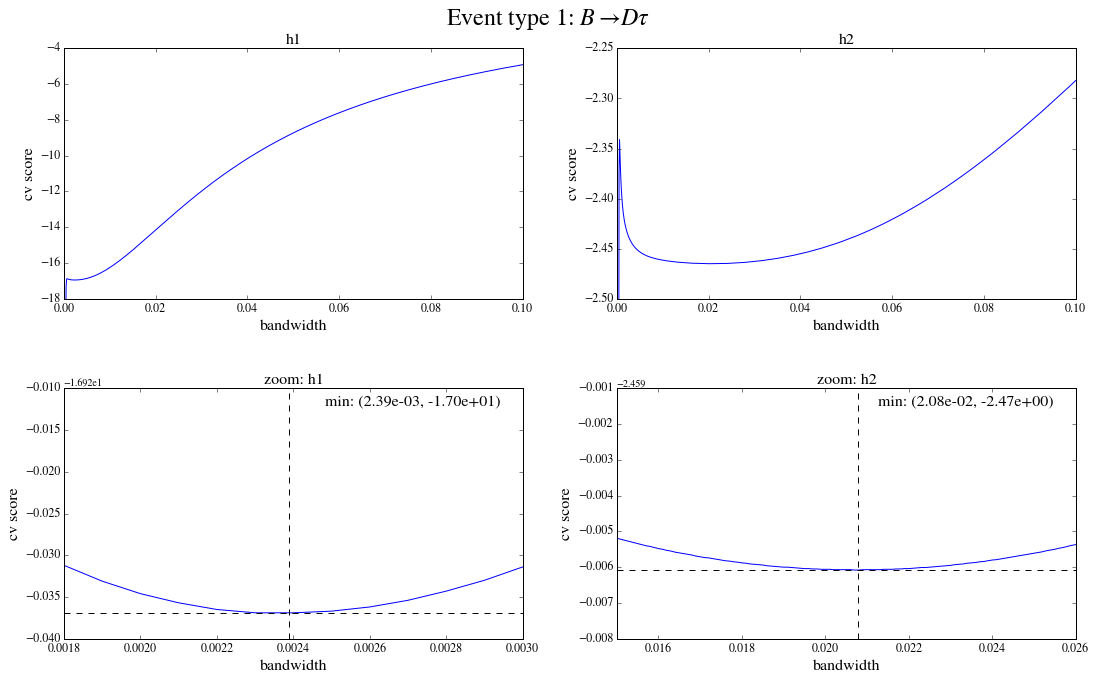

In [4]:
fig = plt.figure(figsize=(5*1.615*2,10))
fig.suptitle(r'Event type 1: $B\rightarrow D\tau$', fontsize=24)

ax = fig.add_subplot(2,2,1)
plot_cvscan('cv/evttype1.col0.txt', ax, title='h1', xlim=(0.0, 0.1), ylim=(-18,-4))
ax = fig.add_subplot(2,2,2)
plot_cvscan('cv/evttype1.col1.txt', ax, title='h2', xlim=(0.0,0.1), ylim=(-2.5,-2.25))

ax = fig.add_subplot(2,2,3)
plot_cvscan('cv/evttype1.col0.txt', ax, title='zoom: h1', xlim=(0.0018,0.003), ylim=(-16.96,-16.93), quad_lsq=True)
ax = fig.add_subplot(2,2,4)
plot_cvscan('cv/evttype1.col1.txt', ax, title='zoom: h2', xlim=(0.015, 0.026), ylim=(-2.467,-2.46), quad_lsq=True)

plt.tight_layout(pad=4.0, w_pad=2.0)
plt.show()

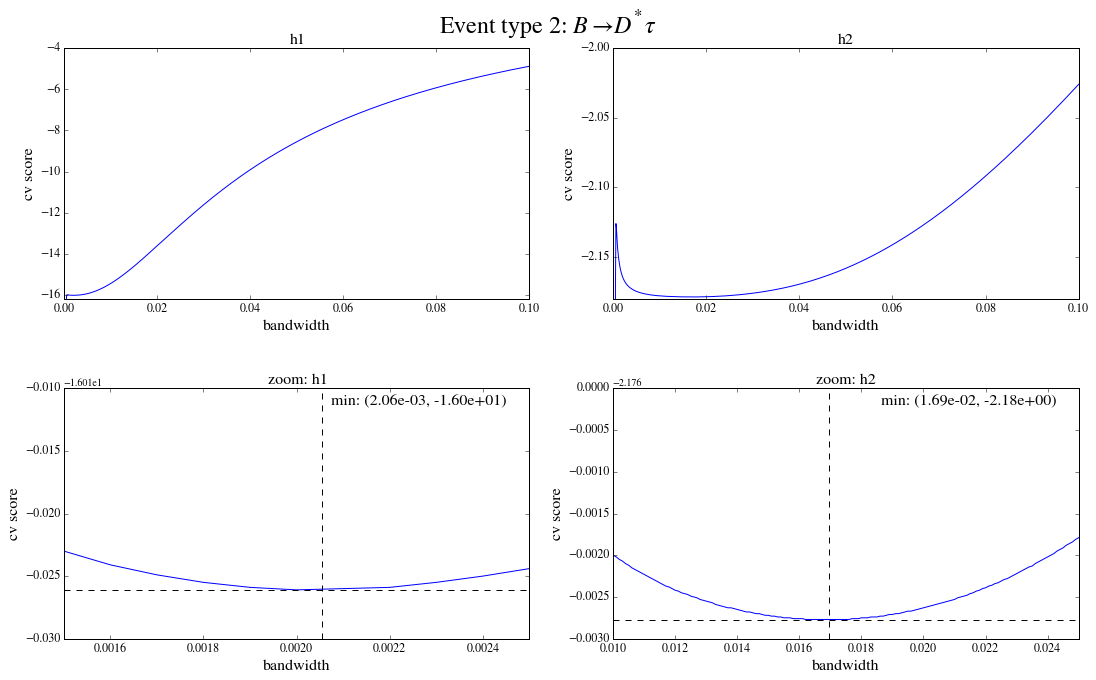

In [5]:
fig = plt.figure(figsize=(5*1.615*2,10))
fig.suptitle(r'Event type 2: $B\rightarrow D^*\tau$', fontsize=24)

ax = fig.add_subplot(2,2,1)
plot_cvscan('cv/evttype2.col0.txt', ax, title='h1', xlim=(0.0, 0.1), ylim=(-16.2,-4))
ax = fig.add_subplot(2,2,2)
plot_cvscan('cv/evttype2.col1.txt', ax, title='h2', xlim=(0.0,0.1), ylim=(-2.18,-2.0))

ax = fig.add_subplot(2,2,3)
plot_cvscan('cv/evttype2.col0.txt', ax, title='zoom: h1', xlim=(0.0015,0.0025), ylim=(-16.04,-16.02), quad_lsq=True)
ax = fig.add_subplot(2,2,4)
plot_cvscan('cv/evttype2.col1.txt', ax, title='zoom: h2', xlim=(0.01, 0.025), ylim=(-2.179,-2.176), quad_lsq=True)

plt.tight_layout(pad=4.0, w_pad=2.0)
plt.show()

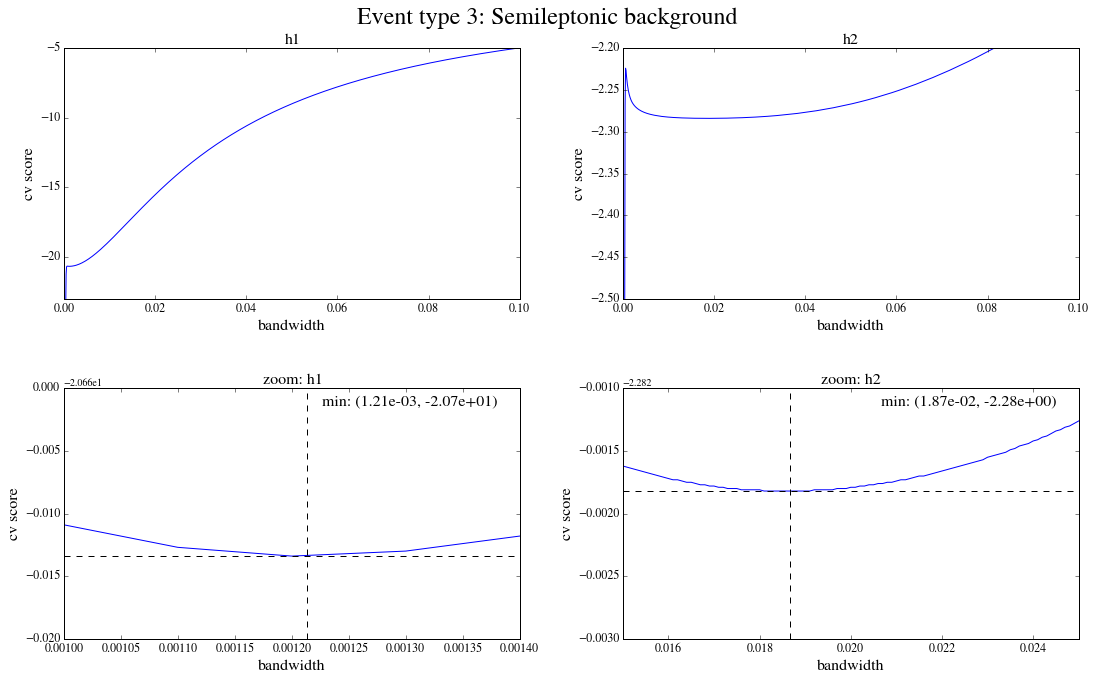

In [6]:
fig = plt.figure(figsize=(5*1.615*2,10))
fig.suptitle(r'Event type 3: Semileptonic background', fontsize=24)

ax = fig.add_subplot(2,2,1)
plot_cvscan('cv/evttype3.col0.txt', ax, title='h1', xlim=(0.0,0.1), ylim=(-23,-5))
ax = fig.add_subplot(2,2,2)
plot_cvscan('cv/evttype3.col1.txt', ax, title='h2', xlim=(0.0,0.1),ylim=(-2.5,-2.2))
ax = fig.add_subplot(2,2,3)
plot_cvscan('cv/evttype3.col0.txt', ax, title='zoom: h1', xlim=(0.001, 0.0014),ylim=(-20.68,-20.66), quad_lsq=True)
ax = fig.add_subplot(2,2,4)
plot_cvscan('cv/evttype3.col1.txt', ax, title='zoom: h2', xlim=(0.015,0.025), ylim=(-2.285,-2.283), quad_lsq=True)

plt.tight_layout(pad=4.0, w_pad=2.0)
plt.show()

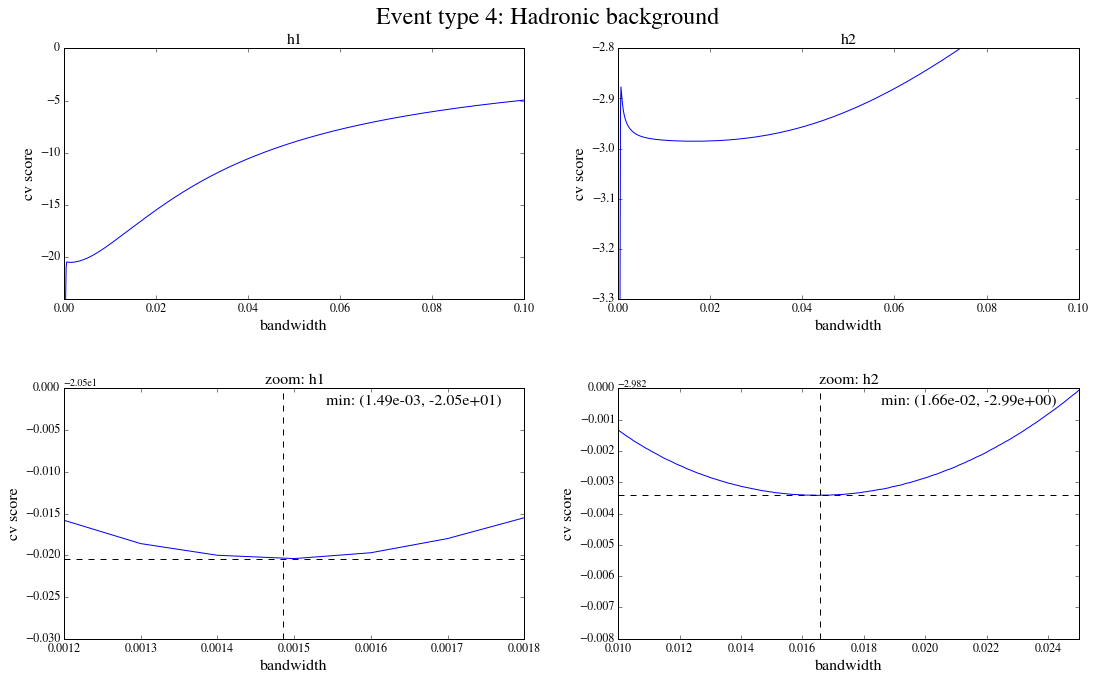

In [20]:
fig = plt.figure(figsize=(5*1.615*2,10))
fig.suptitle(r'Event type 4: Hadronic background', fontsize=24)

ax = fig.add_subplot(2,2,1)
plot_cvscan('cv/evttype4.col0.txt', ax, title='h1', xlim=(0.0,0.1), ylim=(-24,0))
ax = fig.add_subplot(2,2,2)
plot_cvscan('cv/evttype4.col1.txt', ax, title='h2', xlim=(0.0,0.1), ylim=(-3.3,-2.8))
ax = fig.add_subplot(2,2,3)
plot_cvscan('cv/evttype4.col0.txt', ax, title='zoom: h1', xlim=(0.0012, 0.0018),ylim=(-20.53,-20.5), quad_lsq=True)
#plot_cvscan('cv/evttype4.col0.txt', ax, title='zoom: h1', xlim=(0.0005, 0.003),ylim=(-20.53,-20.4))
ax = fig.add_subplot(2,2,4)
plot_cvscan('cv/evttype4.col1.txt', ax, title='zoom: h2', xlim=(0.01,0.025), ylim=(-2.99,-2.982), quad_lsq=True)

plt.tight_layout(pad=4.0, w_pad=2.0)
plt.show()

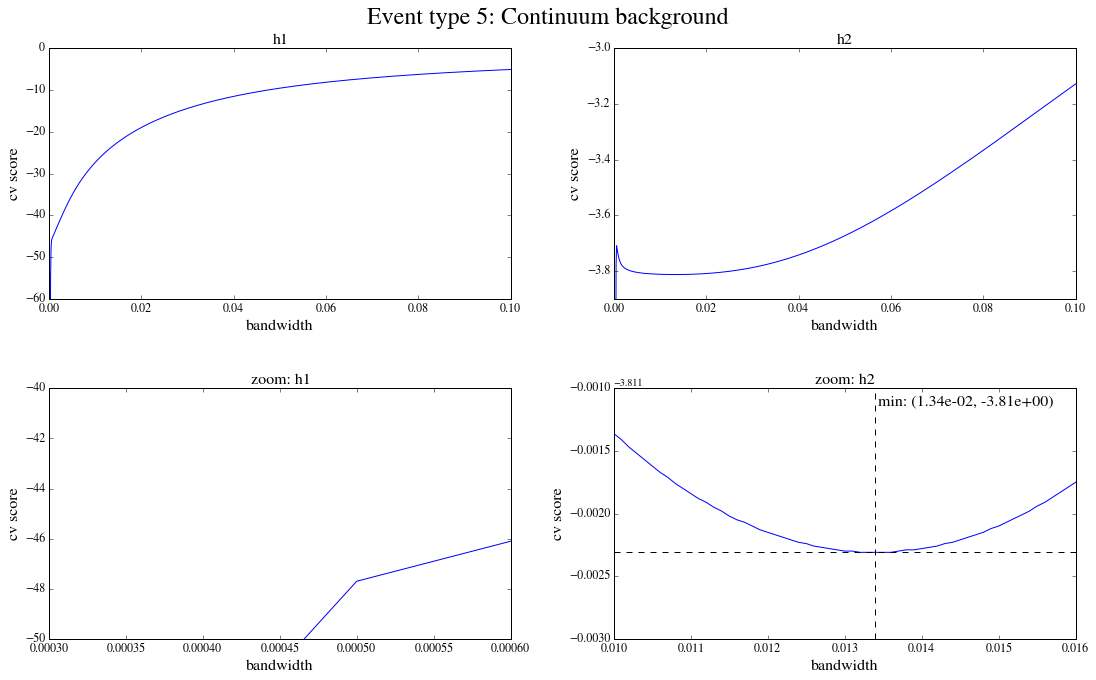

In [23]:
fig = plt.figure(figsize=(5*1.615*2,10))
fig.suptitle(r'Event type 5: Continuum background', fontsize=24)

ax = fig.add_subplot(2,2,1)
plot_cvscan('cv/evttype5.col0.txt', ax, title='h1',xlim=(0,0.1), ylim=(-60, 0))
ax = fig.add_subplot(2,2,2)
plot_cvscan('cv/evttype5.col1.txt', ax, title='h2', xlim=(0, 0.1), ylim=(-3.9,-3))
ax = fig.add_subplot(2,2,3)
#plot_cvscan('cv/evttype5.col0.txt', ax, title='zoom: h1',xlim=(0,0.003), ylim=(-60, -40))
plot_cvscan('cv/evttype5.col0.txt', ax, title='zoom: h1',xlim=(0.0003,0.0006), ylim=(-50, -40))
ax = fig.add_subplot(2,2,4)
plot_cvscan('cv/evttype5.col1.txt', ax, title='zoom: h2', xlim=(0.01, 0.016), ylim=(-3.814,-3.812), quad_lsq=True)

plt.tight_layout(pad=4.0, w_pad=2.0)
plt.show()